# Import Libraries and Data

In [2]:
# EDA - Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter
import math

# EDA - Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

# Classification
from sklearn import (datasets,
                     metrics,
                     model_selection as skms,
                     naive_bayes,
                     neighbors)

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              ExtraTreesClassifier,
                              GradientBoostingClassifier)

from sklearn.model_selection import (cross_val_score,
                                     cross_val_predict,
                                     train_test_split,
                                     GridSearchCV)

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             confusion_matrix,
                             f1_score,
                             roc_curve,
                             auc,
                             classification_report,
                             precision_recall_curve,)


from sklearn.linear_model import (LogisticRegression, 
                                  Perceptron, 
                                  SGDClassifier)

from xgboost import XGBClassifier


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/modified/cell2celltrain_1.csv',
                index_col='CustomerID')
print('Shape of train dataset:', df.shape)

Shape of train dataset: (71018, 40)


# Final Data Prep

In [4]:
# Remove highly correlated columns
df = df.drop(['BuysViaMailOrder',
                    'Homeownership',
                    'ServiceArea'
                   ],
                   axis=1)

In [5]:
# Review Categorical Column Outputs
# train_obj = df.drop("CustomerID", axis= 1)

for col in df.dtypes[df.dtypes == object].index:
    print(col,'\n', df[col].unique())

Churn 
 ['Yes' 'No' nan]
ChildrenInHH 
 ['No' 'Yes']
HandsetWebCapable 
 ['Yes' 'No']
TruckOwner 
 ['No' 'Yes']
RVOwner 
 ['No' 'Yes']
RespondsToMailOffers 
 ['Yes' 'No']
OptOutMailings 
 ['No' 'Yes']
NonUSTravel 
 ['No' 'Yes']
OwnsComputer 
 ['Yes' 'No']
HasCreditCard 
 ['Yes' 'No']
NewCellphoneUser 
 ['No' 'Yes']
MadeCallToRetentionTeam 
 ['Yes' 'No']
CreditRating 
 ['High' 'Medium' 'Low']
PrizmCode 
 ['Suburban' 'Town' 'Other' 'Rural']
Occupation 
 ['Professional' 'Crafts' 'Other' 'Self' 'Retired' 'Homemaker' 'Clerical'
 'Student']
MaritalStatus 
 ['No' 'Yes' 'Unknown']
RevenuesChange 
 ['Decrease' 'No Change' 'Increase']
MinutesChange 
 ['Large Decrease' 'Decrease' 'Large Increase' 'No Change' 'Increase']
ReferralsMade 
 ['No' 'Yes']
DirectorAssistedCallsMade 
 ['Yes' 'No']
RoamingCallsMade 
 ['No' 'Yes']
ExperiencedDroppedCalls 
 ['Yes' 'No']
CustomerCareCallsMade 
 ['No' 'Yes']
BlockedCallsMade 
 ['Yes' 'No']
UnansweredCallsReceived 
 ['Yes' 'No']
ThreewayCallsMade 
 ['No' 'Yes']

In [6]:
binary_cols=[]
multi_Value=[]
for col in df.columns:
    if df[col].dtype =='object':
        if df[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)
            
binary_cols

['ChildrenInHH',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'MadeCallToRetentionTeam',
 'ReferralsMade',
 'DirectorAssistedCallsMade',
 'RoamingCallsMade',
 'ExperiencedDroppedCalls',
 'CustomerCareCallsMade',
 'BlockedCallsMade',
 'UnansweredCallsReceived',
 'ThreewayCallsMade',
 'CallForwardingCallsMade',
 'AdjustmentsToCreditRatingMade']

In [7]:
# Label encoding for Binary Yes/ No Columns    
def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 
                           'No': 0})
    return

label_encoding(binary_cols, df)

In [8]:
ind_CreditRating = pd.get_dummies(df['CreditRating'], prefix='CreditRating')
ind_PrizmCode = pd.get_dummies(df['PrizmCode'], prefix='PrizmCode')
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
ind_RevenuesChange = pd.get_dummies(df['RevenuesChange'], prefix='RevenuesChange')
ind_MinutesChange = pd.get_dummies(df['MinutesChange'], prefix='MinutesChange')

In [9]:
df['MinutesChange'].unique()

array(['Large Decrease', 'Decrease', 'Large Increase', 'No Change',
       'Increase'], dtype=object)

In [10]:
ind_MinutesChange.head()

,MinutesChange_Decrease,MinutesChange_Increase,MinutesChange_Large Decrease,MinutesChange_Large Increase,MinutesChange_No Change
CustomerID,,,,,
3000002,0,0,1,0,0
3000010,1,0,0,0,0
3000014,1,0,0,0,0
3000022,0,0,0,1,0
3000026,0,0,0,0,1


In [11]:
df.shape

(71018, 37)

In [12]:
df1 = pd.concat([ind_CreditRating, 
                 ind_PrizmCode,  
                 ind_MaritalStatus, 
                 ind_RevenuesChange, 
                 ind_MinutesChange])

df1.shape

(355090, 18)

In [13]:
df_int = df.select_dtypes(['int64'])

In [14]:
df1 = pd.concat([ind_CreditRating, 
                 ind_PrizmCode, 
                 ind_MaritalStatus, 
                 ind_RevenuesChange, 
                 ind_MinutesChange, 
                 df_int,
                 df['Churn']
                ],
               axis=1)

In [15]:
df1.shape

(71018, 44)

# Split the Dataset

In [16]:
df = df1.loc[df1['Churn'].notnull()]
df_test = df1.loc[df1['Churn'].isnull()].drop(columns='Churn')

In [17]:
df.Churn.replace(to_replace='Yes', value=1, inplace=True)
df.Churn.replace(to_replace='No', value=0, inplace=True)

In [18]:
y = df['Churn']
X = df
X.pop('Churn')

CustomerID
3000002    1
3000010    1
3000014    0
3000022    0
3000026    1
          ..
3399958    1
3399974    0
3399978    1
3399990    0
3399994    0
Name: Churn, Length: 51022, dtype: int64

In [19]:
df.shape

(51022, 43)

In [20]:
y.shape

(51022,)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51022 entries, 3000002 to 3399994
Data columns (total 43 columns):
CreditRating_High                51022 non-null uint8
CreditRating_Low                 51022 non-null uint8
CreditRating_Medium              51022 non-null uint8
PrizmCode_Other                  51022 non-null uint8
PrizmCode_Rural                  51022 non-null uint8
PrizmCode_Suburban               51022 non-null uint8
PrizmCode_Town                   51022 non-null uint8
MaritalStatus_No                 51022 non-null uint8
MaritalStatus_Unknown            51022 non-null uint8
MaritalStatus_Yes                51022 non-null uint8
RevenuesChange_Decrease          51022 non-null uint8
RevenuesChange_Increase          51022 non-null uint8
RevenuesChange_No Change         51022 non-null uint8
MinutesChange_Decrease           51022 non-null uint8
MinutesChange_Increase           51022 non-null uint8
MinutesChange_Large Decrease     51022 non-null uint8
MinutesChange_Large

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    y,
                                                   test_size=0.71,
                                                   random_state=16,
                                                   stratify=y)

print('X_train shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

X_train shape:  (14796, 43)
y_train.shape:  (14796,)
X_test.shape:  (36226, 43)


In [23]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("Initial Accuracy Score:  {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))),'-'*40)
            
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n") 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test)))) 
        print("Initial Accuracy Score:  {0:.4f}".format(accuracy_score(y_test, clf.predict(X_test))))
        cv=10
        res = cross_val_score(clf, X_test, y_test.ravel(), cv=cv, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)), "(Cross-fold Validations = 10)")
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)), '\n')      

# Models

## Decison Tree

In [24]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
prec_decision_tree = round(precision_score(y_pred=decision_tree.predict(X_test), y_true=y_test)* 100, 2)
recall_decision_tree = round(recall_score(y_pred=decision_tree.predict(X_test), y_true=y_test)* 100, 2)
f1_decision_tree = round(f1_score(y_pred=decision_tree.predict(X_test), y_true=y_test)* 100, 2)

print_score(decision_tree, X_train, y_train, X_test, y_test, train=True)
print_score(decision_tree, X_train, y_train, X_test, y_test, train=False)

Train Result:

Initial Accuracy Score:  0.9981
 ----------------------------------------
Test Result:

Confusion Matrix: 
 [[18168  7622]
 [ 6775  3661]]

Initial Accuracy Score:  0.6026
Average Accuracy: 	 0.6051 (Cross-fold Validations = 10)
Accuracy SD: 		 0.0045 



## Random Forest

In [25]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train.ravel())

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
prec_random_forest = round(precision_score(y_pred=random_forest.predict(X_test), y_true=y_test)* 100, 2)
recall_random_forest = round(recall_score(y_pred=random_forest.predict(X_test), y_true=y_test)* 100, 2)
f1_random_forest = round(f1_score(y_pred=random_forest.predict(X_test), y_true=y_test)* 100, 2)

print_score(random_forest, X_train, y_train, X_test, y_test, train=True)
print_score(random_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:

Initial Accuracy Score:  0.9734
 ----------------------------------------
Test Result:

Confusion Matrix: 
 [[23551  2239]
 [ 9130  1306]]

Initial Accuracy Score:  0.6862
Average Accuracy: 	 0.6919 (Cross-fold Validations = 10)
Accuracy SD: 		 0.0043 



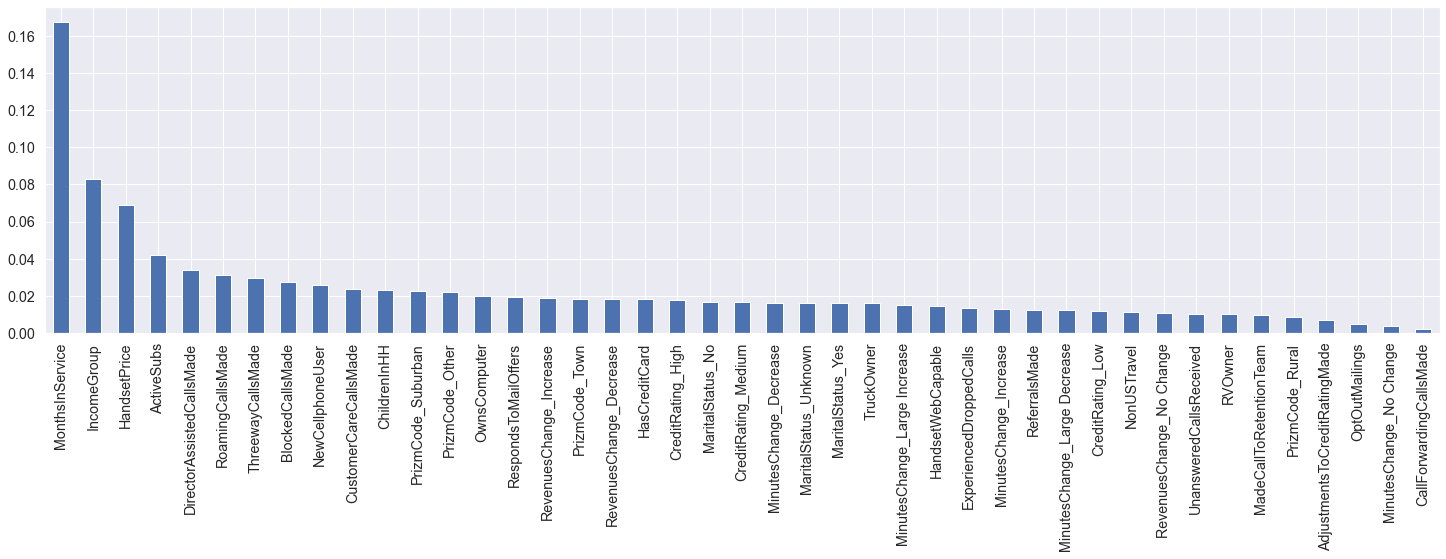

In [26]:
import seaborn as sns

sns.set(font_scale=1.3)
pd.Series(random_forest.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', 
                                                                  figsize=(25,6));
plt.show()

## Extra-Trees (Extremely Randomized Trees)

In [27]:
extra_trees = ExtraTreesClassifier(random_state=42, min_samples_split=5)
extra_trees.fit(X_train,y_train)

acc_extra_trees = round(extra_trees.score(X_test, y_test) * 100, 2)
prec_extra_trees = round(precision_score(y_pred=extra_trees.predict(X_test), y_true=y_test)* 100, 2)
recall_extra_trees = round(recall_score(y_pred=extra_trees.predict(X_test), y_true=y_test)* 100, 2)
f1_extra_trees = round(f1_score(y_pred=extra_trees.predict(X_test), y_true=y_test)* 100, 2)

print_score(extra_trees, X_train, y_train, X_test, y_test, train=True)
print_score(extra_trees, X_train, y_train, X_test, y_test, train=False)

Train Result:

Initial Accuracy Score:  0.9762
 ----------------------------------------
Test Result:

Confusion Matrix: 
 [[23249  2541]
 [ 8951  1485]]

Initial Accuracy Score:  0.6828
Average Accuracy: 	 0.6851 (Cross-fold Validations = 10)
Accuracy SD: 		 0.0040 



## AdaBoost

In [28]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train.ravel())

acc_ada_boost = round(ada_boost.score(X_test, y_test) * 100, 2)
prec_ada_boost = round(precision_score(y_pred=ada_boost.predict(X_test), y_true=y_test)* 100, 2)
recall_ada_boost = round(recall_score(y_pred=ada_boost.predict(X_test), y_true=y_test)* 100, 2)
f1_ada_boost = round(f1_score(y_pred=ada_boost.predict(X_test), y_true=y_test)* 100, 2)

print_score(ada_boost, X_train, y_train, X_test, y_test, train=True)
print_score(ada_boost, X_train, y_train, X_test, y_test, train=False)

Train Result:

Initial Accuracy Score:  0.7143
 ----------------------------------------
Test Result:

Confusion Matrix: 
 [[25403   387]
 [ 9937   499]]

Initial Accuracy Score:  0.7150
Average Accuracy: 	 0.7145 (Cross-fold Validations = 10)
Accuracy SD: 		 0.0035 



## Gradient Boosting Classifier

In [29]:
gradient_boost_clf = GradientBoostingClassifier()
gradient_boost_clf.fit(X_train, y_train.ravel())

acc_gradient_boost_clf = round(gradient_boost_clf.score(X_test, y_test) * 100, 2)
prec_gradient_boost_clf = round(precision_score(y_pred=gradient_boost_clf.predict(X_test), y_true=y_test)* 100, 2)
recall_gradient_boost_clf = round(recall_score(y_pred=gradient_boost_clf.predict(X_test), y_true=y_test)* 100, 2)
f1_gradient_boost_clf = round(f1_score(y_pred=gradient_boost_clf.predict(X_test), y_true=y_test)* 100, 2)

print_score(gradient_boost_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gradient_boost_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Initial Accuracy Score:  0.7207
 ----------------------------------------
Test Result:

Confusion Matrix: 
 [[25386   404]
 [ 9877   559]]

Initial Accuracy Score:  0.7162
Average Accuracy: 	 0.7174 (Cross-fold Validations = 10)
Accuracy SD: 		 0.0032 



## Logistic Regression

In [30]:
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15)
logistic_regression.fit(X_train, y_train)

acc_logistic_regression = round(logistic_regression.score(X_test, y_test) * 100, 2)
prec_logistic_regression = round(precision_score(y_pred=logistic_regression.predict(X_test), y_true=y_test)* 100, 2)
recall_logistic_regression = round(recall_score(y_pred=logistic_regression.predict(X_test), y_true=y_test)* 100, 2)
f1_logistic_regression = round(f1_score(y_pred=logistic_regression.predict(X_test), y_true=y_test)* 100, 2)

print_score(logistic_regression, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression, X_train, y_train, X_test, y_test, train=False)

Train Result:

Initial Accuracy Score:  0.7117
 ----------------------------------------
Test Result:

Confusion Matrix: 
 [[25572   218]
 [10186   250]]

Initial Accuracy Score:  0.7128
Average Accuracy: 	 0.7134 (Cross-fold Validations = 10)
Accuracy SD: 		 0.0029 



### Grid Search - Logistic Regression

In [31]:
grid_values = {'C':[0.001,0.01,1,10], 'penalty': ['l1', 'l2']}
grid_lr = GridSearchCV(logistic_regression, param_grid = grid_values)#, scoring = 'roc_auc')
grid_lr = grid_lr.fit(X_train, y_train)

In [32]:
print('grid_search best score: ', grid_lr.best_score_)

grid_lr.best_estimator_.get_params()

grid_search best score:  0.7118815896188159


{'C': 0.001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': -1,
 'penalty': 'l1',
 'random_state': 15,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
grid_lr

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=15, solver='warn', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 1, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# Model Evaluations

In [34]:
# Create a list which contains classifiers 
classifiers = []
classifiers.append(decision_tree)
classifiers.append(random_forest)
classifiers.append(extra_trees)
classifiers.append(ada_boost)
classifiers.append(gradient_boost_clf)
classifiers.append(logistic_regression)
print('Number of Classifiers: ',len(classifiers))

# Number of Cross Validations
cv = 10
print('Number of Cross Validations: ', cv, '\n','-'*40)

# Create a list which contains cross validation results for each classifier
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 10))
    
# Mean and standard deviation of cross validation results for each classifier  
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(round(cv_result.mean()*100,2))
    cv_std.append(round(cv_result.std(),4))

algos = ['Decision Tree',
         'Random Forest',
         'Extra Trees',
         'AdaBoost',
         'Gradient Boosting Classifier',
         'Logistic Regression'
        ]

acc_scores = [acc_decision_tree,
              acc_random_forest, 
              acc_extra_trees,
              acc_ada_boost,
              acc_gradient_boost_clf,
              acc_logistic_regression
             ]

prec_scores = [prec_decision_tree,
               prec_random_forest, 
               prec_extra_trees,
               prec_ada_boost,
               prec_gradient_boost_clf,
               prec_logistic_regression
              ]

recall_scores = [recall_decision_tree,
                 recall_random_forest, 
                 recall_extra_trees,
                 recall_ada_boost,
                 recall_gradient_boost_clf,
                 recall_logistic_regression
                ]

f1_scores = [f1_decision_tree,
             f1_random_forest, 
             f1_extra_trees,
             f1_ada_boost,
             f1_gradient_boost_clf,
             f1_logistic_regression
            ]

    
cv_res = pd.DataFrame({'Algorithm': algos,
                       'Initial Accuracy Scores': acc_scores,
                       'Cross Validation Mean': cv_mean, 
                       'Cross Validation Std': cv_std,
                       'Precision Score': prec_scores,
                       'Recall Scores': recall_scores,
                       'F1 Scores': f1_scores
                       })

cv_res.sort_values(by = 'F1 Scores', ascending = False).set_index('Algorithm')

Number of Classifiers:  6
Number of Cross Validations:  10 
 ----------------------------------------


,Initial Accuracy Scores,Cross Validation Mean,Cross Validation Std,Precision Score,Recall Scores,F1 Scores
Algorithm,,,,,,
Decision Tree,60.26,59.62,0.0139,32.45,35.08,33.71
Extra Trees,68.28,68.48,0.0073,36.89,14.23,20.54
Random Forest,68.62,69.07,0.0064,36.84,12.51,18.68
Gradient Boosting Classifier,71.62,71.44,0.0037,58.05,5.36,9.81
AdaBoost,71.50,71.35,0.0037,56.32,4.78,8.81
Logistic Regression,71.28,71.13,0.0023,53.42,2.40,4.59


In [35]:
print('As we can see, the',cv_res['Algorithm'][0], 'model has the highest F1 Score, so we will proceed with this model.')

As we can see, the Decision Tree model has the highest F1 Score, so we will proceed with this model.


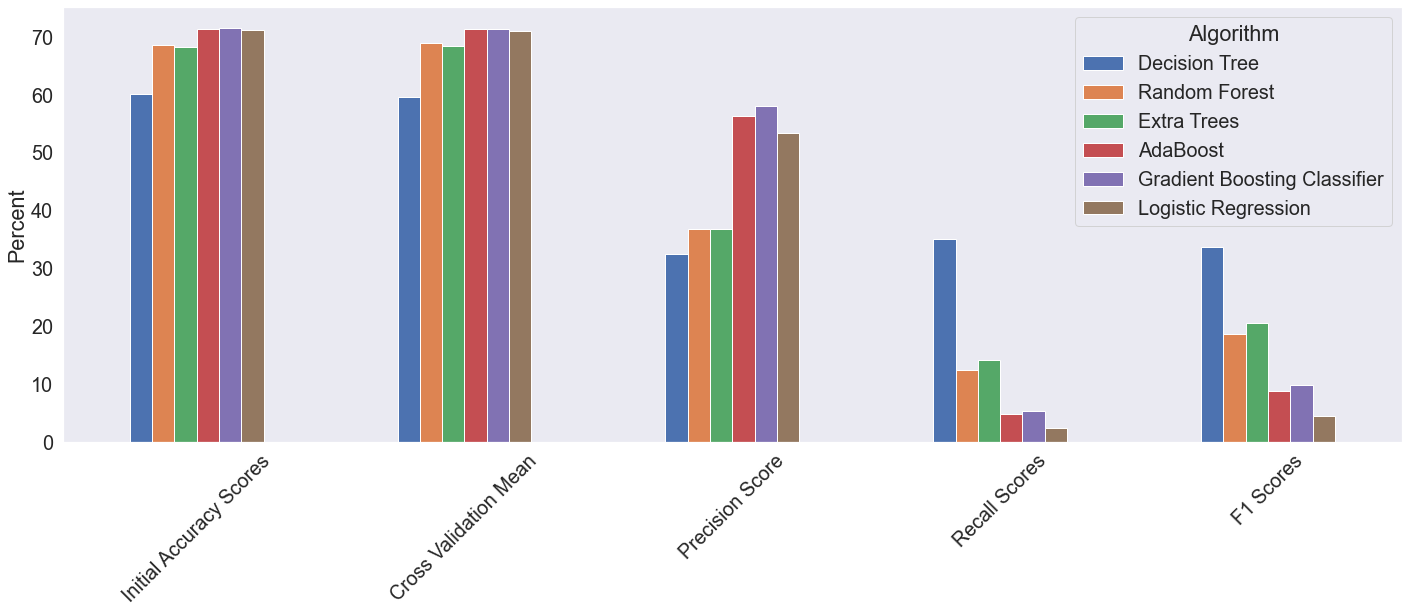

In [36]:
cv_res1 = cv_res.drop(columns='Cross Validation Std').set_index('Algorithm').T
sns.set(font_scale = 1.8)
fig, ax = plt.subplots(figsize=(24,8))
cv_res1.plot(kind='bar', ax=ax)
plt.xticks(rotation = 45)
plt.ylabel('Percent')
ax.grid();

## Visualize F1 Scores to Identify the Best Model

Text(0.5, 1.0, 'F1 Scores')

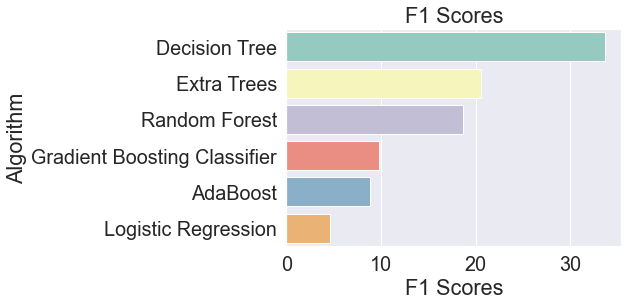

In [37]:
sns.barplot('F1 Scores', 
            'Algorithm', 
            data = cv_res, 
            order = cv_res.sort_values(by = 'F1 Scores', 
                                       ascending = False)['Algorithm'], 
            palette = 'Set3', 
            **{'xerr': cv_std})

plt.ylabel('Algorithm')
plt.title('F1 Scores')

## Confusion Matrix of Best Model (Decision Tree)

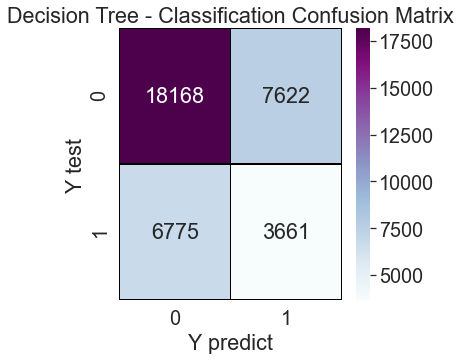

In [38]:
# The confusion matrix
dec_tree_cm = confusion_matrix(y_test, decision_tree.predict(X_test))
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dec_tree_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Decision Tree - Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

## Feature Importance Scores

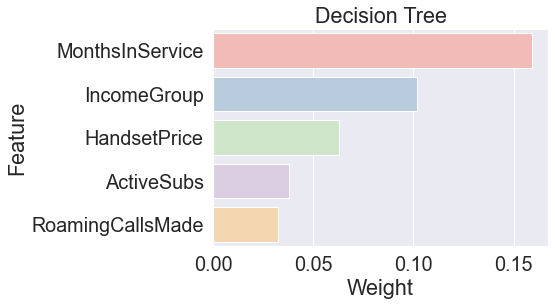

In [39]:
Rfclf_fea = pd.DataFrame(decision_tree.feature_importances_)
Rfclf_fea["Feature"] = list(X_train) 
Rfclf_fea.sort_values(by=0, ascending=False).head()
g = sns.barplot(0,"Feature",
                data = Rfclf_fea.sort_values(by=0, ascending=False)[0:5], 
                palette="Pastel1",orient = "h")

g.set_xlabel("Weight")
g = g.set_title("Decision Tree")

## Receiver Operating Characteristic Curve

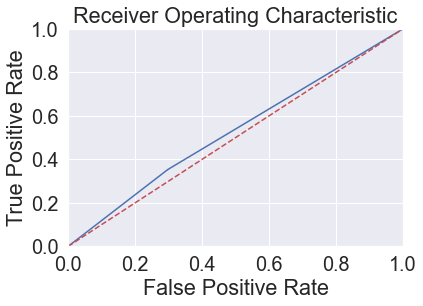

In [40]:
probs = decision_tree.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Combine Prediction Results to Test Dataset

In [41]:
Y_pred = decision_tree.predict(df_test)

In [42]:
df_test.reset_index(inplace=True)

In [43]:
print('The number of customers in this prediction is: ' ,len(Y_pred))

The number of customers in this prediction is:  19996


In [44]:

submit = pd.DataFrame({'CustomerID': df_test['CustomerID'], 
                       'Churn': Y_pred})
submit

,CustomerID,Churn
0,3000006,0
1,3000018,0
2,3000034,0
3,3000070,0
4,3000074,1
...,...,...
19991,3399938,0
19992,3399950,0
19993,3399966,1
19994,3399970,0


# Export to Final Folder - 

In [45]:
# See 03_BUAFinalProject_Results File for Overview of Results
submit.to_csv('../data/final/cell2cell_results.csv', index=False)